


# **Course Work: Noon Company reputation Sentiment Analysis Project**

---

**Course code and name:** F21AA – Applied Text Analytics

**Type of assessment:** Group Assessment Coursework 1 – Company Reputation Analysis

**Coursework Title:** Noon Company reputation Sentiment Analysis

**Group Number:** Dubai Group 3

**Student Names and IDs:**
*   Sattar Shaikh Eherar (H00450426)
*   Onafeso Fiyifoluwa (H00466745)
*   Hariharakumar Rathinar (H00463082)
*   Yadubanshi Pratibha (H00456474)


**Google Colab Link:** https://colab.research.google.com/drive/1FfwGcag2Mtje5q_E5kq8wl4YwWNZtTP8?usp=sharing

---



## Introduction

This notebook provides a comprehensive approach to <b>Noon Reputation Sentiment Analysis</b> from <b>Reddit</b> with enhanced preprocessing, clustering visualizations, and supervised learning improvements for <b>PG_Dubai 3  Text Analytics Coursework 1 </b>. The topic chosen for our company reputation analysis is <b> Noon </b>.

The Google colab is divided into sections mentioned in the course work and each can be easily navigated via the "Table of Content" option available in the left side of google colab window. This google colab contains below sections

1.   **Libraries** section contains all the python libraries used in the project
2.   **Section A** covering the data collection from Reddit with detail explanasion on how more relevant comment are extracted.
3.   Section B Contains the code on data analysis, section and labelling process.
4.   Section C contains the code for text analytics pipeline
5.   Section D contains visualization and insights.
6.   Section E details on the discussion and coclusion on the experiment
7.   Section F contains the link of the reserarch question
8.   Last section Work split contains the work split done among team members.




---


<b>GitHub Repository</b>
Please click on the below for the project repository for this coursework <br><a href="https://github.com/HWhr3000/F12AA_TextAnalystics">F21AA_Group3</a>



---


            
            
            

## **Python Library**


In [ ]:
# ==============================================================================
# Comprehensive for Sentiment Analysis with Enhanced Preprocessing,
# Clustering Visualizations, and Supervised Learning Improvements
# ==============================================================================

import pandas as pd
import numpy as np
import re, string, emoji
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

# NLTK and Text Processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# WordCloud visualization
from wordcloud import WordCloud

# Sentiment Analysis Libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import flair
from transformers import pipeline

# Machine Learning & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

# Additional dimensionality reduction for visualization
from sklearn.manifold import TSNE

# Oversampling to address imbalance
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier



# Topic Modeling with gensim and visualization with pyLDAvis
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




---



## **Section A** : **Data Collection**

### Data Collection: Reddit Comments about Noon

The data for this analysis was collected using two complementary Reddit scrapers:

**Extended Noon Scraper** ([scrape_noon_extended.py](https://github.com/HWhr3000/F12AA_TextAnalystics/blob/main/src/scrape_noon_extended.py)):

# Data Collection

The Reddit scraper we developed collects Noon-related comments from UAE subreddits. Here's how it works:

- **What it does**: Searches 15+ UAE subreddits for discussions about Noon, extracts both posts and comments, and filters content specifically mentioning Noon and its services.

- **How it works**:
  1. Connects to Reddit's API and searches for 20 different Noon-related terms
  2. Uses pattern matching to distinguish between Noon (the company) and noon (time of day)
  3. Processes each post and its comments, preserving their relationship
  4. Cleans the text by removing extra whitespace and formatting issues
  5. Creates three separate datasets: all content, Noon-specific comments, and posts
  
- **Results**: The scraper collects comprehensive data including post titles, comment text, author information, timestamps, and engagement metrics, enabling detailed sentiment analysis.

   - Comprehensive coverage of UAE-related subreddits (15+ communities including):
     - r/dubai, r/abudhabi, r/UAE, r/DubaiCentral
     - r/DubaiPetrolHeads, r/dubaiclassifieds, r/dubaigaming
     - And many more local communities
   
   - Advanced Noon-specific features:
     - Intelligent keyword detection for various Noon services:
       - noon.com
       - noon food
       - noon express
       - noon grocery
       - noon marketplace
       - noon daily
     
   - Enhanced data collection:
     - Post and comment content
     - User interaction metrics
     - Temporal information
     - Author details
     - Subreddit context
     - Content relevance flags

**Data Processing**:

   - Text cleaning and standardization
   - Removal of irrelevant content
   - Structured data formatting
   - Metadata enrichment

The scrapers use the PRAW (Python Reddit API Wrapper) library and implement best practices for Reddit data collection, including proper error handling, rate limiting, and comprehensive data validation.

**Extended Noon Scraper**

In [ ]:
import praw
import pandas as pd
from datetime import datetime
import time
from typing import List, Dict
import re

class RedditScraper:
    def __init__(self, client_id: str, client_secret: str, user_agent: str):
        """Initialize Reddit API client."""
        self.reddit = praw.Reddit(
            client_id=client_id,
            client_secret=client_secret,
            user_agent=user_agent
        )
        # Extended list of relevant subreddits
        self.subreddits = [
            'dubai', 'abudhabi', 'UAE', 'DubaiCentral',
            'DubaiPetrolHeads', 'dubaiclassifieds', 'dubaigaming',
            'UAEexchange', 'sharjah', 'ajman', 'RAK', 'mydubai',
            'dubaifood', 'dubaipets', 'dubailife'
        ]

    def contains_noon_reference(self, text: str) -> bool:
        """Check if text contains reference to noon (case insensitive)."""
        keywords = [
            r'\bnoon\b', 'noon.com', 'noon food', 'noon delivery',
            'noon express', 'noon grocery', 'noon shopping',
            'noon marketplace', 'noon seller', 'noon daily'
        ]
        if not text:
            return False
        text = text.lower()
        return any(re.search(keyword.lower(), text) for keyword in keywords)

    def clean_text(self, text: str) -> str:
        """Clean text by removing extra whitespace and newlines."""
        if not text:
            return ""
        # Replace newlines with spaces
        text = text.replace('\n', ' ')
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text

    def process_comment(self, comment, post_id: str, post_title: str) -> Dict:
        """Process a comment and return its data."""
        return {
            'post_id': post_id,
            'post_title': post_title,
            'comment_id': comment.id,
            'author': str(comment.author),
            'comment_text': self.clean_text(comment.body),
            'score': comment.score,
            'created_utc': datetime.fromtimestamp(comment.created_utc),
            'is_submitter': comment.is_submitter,
            'contains_noon_mention': self.contains_noon_reference(comment.body),
            'subreddit': str(comment.subreddit)
        }

    def collect_comments(self, query: str, time_filter: str = 'all') -> List[Dict]:
        """Collect comments from posts matching the query."""
        all_comments = []

        for subreddit_name in self.subreddits:
            try:
                print(f"\nSearching in r/{subreddit_name} for: {query}")
                subreddit = self.reddit.subreddit(subreddit_name)
                # Increased limit to 100 posts per search
                posts = subreddit.search(query, time_filter=time_filter, limit=100)

                for post in posts:
                    # Process posts that either mention noon or have relevant comments
                    post_relevant = self.contains_noon_reference(post.title + ' ' + post.selftext)

                    print(f"Processing post: {post.title[:50]}...")

                    # Add the post itself as a "comment" with type='post'
                    post_data = {
                        'post_id': post.id,
                        'post_title': post.title,
                        'comment_id': post.id,
                        'author': str(post.author),
                        'comment_text': self.clean_text(post.selftext),
                        'score': post.score,
                        'created_utc': datetime.fromtimestamp(post.created_utc),
                        'is_submitter': True,
                        'contains_noon_mention': post_relevant,
                        'type': 'post',
                        'subreddit': str(post.subreddit)
                    }

                    if post_relevant:
                        all_comments.append(post_data)

                    # Process comments with higher limit
                    post.comments.replace_more(limit=5)  # Allow some MoreComments expansion
                    for comment in post.comments.list():
                        try:
                            comment_data = self.process_comment(comment, post.id, post.title)
                            comment_data['type'] = 'comment'
                            # Include comment if either the post or comment is relevant
                            if post_relevant or comment_data['contains_noon_mention']:
                                all_comments.append(comment_data)
                        except Exception as e:
                            print(f"Error processing comment: {str(e)}")
                            continue

                    time.sleep(0.5)  # Respect rate limits

            except Exception as e:
                print(f"Error processing subreddit {subreddit_name}: {str(e)}")
                continue

        return all_comments

def main():
    # Reddit API credentials
    CLIENT_ID = 'i2azsuZjoSWO6wzyRSZGrg'
    CLIENT_SECRET = 'KFHbkissjoq-K3IDx-daXyXpe8vYZQ'
    USER_AGENT = 'Noon Comment Scraper Extended v1.0'

    # Initialize scraper
    scraper = RedditScraper(CLIENT_ID, CLIENT_SECRET, USER_AGENT)

    # Extended search terms related to Noon
    search_terms = [
        'noon.com', 'noon UAE', 'noon delivery', 'noon shopping',
        'noon dubai', 'noon', 'noon food', 'noon express',
        'noon marketplace', 'noon seller', 'noon daily',
        'noon grocery', 'noon minutes', 'noon now',
        'noon sale', 'noon discount', 'noon review',
        'noon experience', 'noon courier', 'noon order'
    ]

    # Time periods to search
    time_periods = ['all']  # Can add 'year', 'month' if needed

    # Collect all comments
    all_comments = []
    for term in search_terms:
        for period in time_periods:
            comments = scraper.collect_comments(term, time_filter=period)
            all_comments.extend(comments)
            print(f"Collected {len(comments)} items for '{term}' in period '{period}'")

    # Convert to DataFrame
    df = pd.DataFrame(all_comments)

    # Remove duplicates based on comment_id
    df = df.drop_duplicates(subset='comment_id')

    # Create separate DataFrames
    posts_df = df[df['type'] == 'post'].copy()
    comments_df = df[df['type'] == 'comment'].copy()

    # Filter comments to only those mentioning noon
    noon_comments_df = comments_df[comments_df['contains_noon_mention']].copy()

    # Save to CSV files with timestamp
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # Save all data
    df.to_csv(f'noon_all_data_extended_{timestamp}.csv', index=False)

    # Save filtered data
    noon_comments_df.to_csv(f'noon_filtered_comments_extended_{timestamp}.csv', index=False)
    posts_df.to_csv(f'noon_posts_extended_{timestamp}.csv', index=False)

    # Print summary
    print("\nScraping Complete!")
    print(f"Total posts collected: {len(posts_df)}")
    print(f"Total comments collected: {len(comments_df)}")
    print(f"Comments mentioning noon: {len(noon_comments_df)}")
    print("\nFiles created:")
    print(f"1. noon_all_data_extended_{timestamp}.csv (all posts and comments)")
    print(f"2. noon_filtered_comments_extended_{timestamp}.csv (only comments mentioning noon)")
    print(f"3. noon_posts_extended_{timestamp}.csv (only posts)")

    # Print subreddit distribution
    print("\nDistribution across subreddits:")
    print(noon_comments_df['subreddit'].value_counts())

if __name__ == "__main__":
    main()

<h3><b>Importing the Noon data for sentiment analysis</b></h3>

In [ ]:
import pandas as pd
commentList_df = pd.read_csv("./Final_Noon_Datasets.csv", header=0)
commentList_df.head()

post_id                                     post_title comment_id   
0  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?    m9mjkdv  \
1  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?    m9mgv03   
2  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?    m9mfqls   
3  1i9vydl                   Warranty from Noon or Amazon    m9lj27y   
4  1i9vydl                   Warranty from Noon or Amazon    m9lhuq1   

             author                                       comment_text  score   
0    99DragonMaster                          will reach border by noon      2  \
1   AgileBadger5988  Be careful of blowing dust during late morning...      9   
2     jamesdongdong  Apart from boring things, you can managed. How...      1   
3  Agitated-Fox2818  You are looking at a tag in noon app saying 1 ...      2   
4             m2bop  Are you sure? There's nothing indicating that ...      1   

           created_utc  is_submitter  contains_noon_mention     type   
0  2025-01-28 16:33:14          True                   True  comment  \
1  2025-01-28 16:12:52         False                   True  comment   
2  2025-01-28 16:03:56         False                   True  comment   
3  2025-01-28 10:38:59         False                   True  comment   
4  2025-01-28 10:28:09          True                   True  comment   

          subreddit  
0  DubaiPetrolHeads  
1  DubaiPetrolHeads  
2  DubaiPetrolHeads  
3               NaN  
4               NaN

In [ ]:
commentList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   post_id                3598 non-null   object
 1   post_title             3598 non-null   object
 2   comment_id             3598 non-null   object
 3   author                 3360 non-null   object
 4   comment_text           3598 non-null   object
 5   score                  3598 non-null   int64 
 6   created_utc            3598 non-null   object
 7   is_submitter           3598 non-null   bool  
 8   contains_noon_mention  3598 non-null   bool  
 9   type                   3598 non-null   object
 10  subreddit              3079 non-null   object
dtypes: bool(2), int64(1), object(8)
memory usage: 260.1+ KB




---



## **Section B: Data Analysis, Selection and Labelling**

### Section B: Data Analysis

The following section demonstrates an end-to-end data analysis workflow for Reddit comments about "Noon."
The steps include:
  1. **Data Loading** from a GitHub-hosted CSV file.
  2. **Keyword-Based Relevance** computation to identify how closely each comment pertains to Noon (using specific keywords).
  3. **Sentiment Analysis** using VADER to gauge the emotional tone of each comment.
  4. **Visualizations** such as histograms, scatter plots, and word clouds to better understand the data distribution.
  5. **Topic Modeling** via Latent Dirichlet Allocation (LDA) to uncover common themes in the comments. This is just a initial analysis to check the topics.

This approach provides an initial overview of the data, helping you decide which comments are worth exploring further.
Even if the keyword-based relevance scores are lower than expected, sentiment analysis reveals a mix of positive and negative sentiments, suggesting the data still has valuable insights for further investigation.

In [ ]:
# Load the dataset of filtered "noon" comments (update the file name as needed)
file_name = "https://github.com/HWhr3000/F12AA_TextAnalystics/raw/main/Data/processed/Final_Noon_Datasets.csv"
df = pd.read_csv(file_name)

# Display basic dataset information
print("DataFrame Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# List of keywords to identify relevance to Noon
keywords = [
    'noon', 'noon.com', 'noon delivery', 'noon shopping',
    'noon review', 'noon experience', 'noon seller',
    'noon daily', 'noon grocery', 'noon express',
    'noon sale', 'noon discount'
]

print("\nKeywords used for relevance:")
print(keywords)

def count_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text_lower = text.lower()
    total_count = 0
    for kw in keywords:
        # Use word boundaries to match whole keywords
        pattern = r'\b' + re.escape(kw) + r'\b'
        total_count += len(re.findall(pattern, text_lower))
    return total_count

# Compute the frequency of all keywords in each comment
df['keyword_count'] = df['comment_text'].apply(lambda x: count_keywords(x, keywords))

df['relevance_score'] = df['score'] * (1 + df['keyword_count'])

print("\nRelevance Score Statistics:")
print(df['relevance_score'].describe())

# Display the top 5 most relevant comments
df_sorted = df.sort_values(by='relevance_score', ascending=False)
print("\nTop 5 Most Relevant Comments:")
print(df_sorted[['comment_text', 'score', 'keyword_count', 'relevance_score']].head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   post_id                3598 non-null   object
 1   post_title             3598 non-null   object
 2   comment_id             3598 non-null   object
 3   author                 3360 non-null   object
 4   comment_text           3598 non-null   object
 5   score                  3598 non-null   int64 
 6   created_utc            3598 non-null   object
 7   is_submitter           3598 non-null   bool  
 8   contains_noon_mention  3598 non-null   bool  
 9   type                   3598 non-null   object
 10  subreddit              3079 non-null   object
dtypes: bool(2), int64(1), object(8)
memory usage: 260.1+ KB
None

First few rows:
   post_id                                     post_title comment_id  \
0  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?  

#### Dataset Overview:
**Source:** 3,598 Reddit comments related to Noon.

**Key Columns:**
	Metadata: post_id, post_title, comment_id, author, subreddit, created_utc, score
	Content: comment_text

**Relevance:**
	Uses keywords (e.g., “noon”, “noon.com”, “noon delivery”, etc.) to compute a keyword_count.
	A composite relevance_score is calculated as score * (1 + keyword_count), with top scores exceeding 1,200.

**Observations:**
	Mixed sentiment (both positive and negative) across comments.
	Suitable for further analysis (sentiment trends, topic modeling, etc.).


In [ ]:
print("Top 10 High Relevance Comments:")
print(df.sort_values(by='relevance_score', ascending=False)[['comment_text', 'relevance_score', 'keyword_count']].head(10))

# Show bottom 10 (lowest relevance scores)
print("\nBottom 10 Low Relevance Comments:")
print(df.sort_values(by='relevance_score', ascending=True)[['comment_text', 'relevance_score', 'keyword_count']].head(10))


Top 10 High Relevance Comments:
                                           comment_text  relevance_score  \
3081  Hey, folks! Writing on behalf of BEOLA team. F...             1235   
321   Guys, it looks like it will have a happy endin...              596   
2217  Why are people still buying these items from 3...              430   
998   All the riders have been planning up strikes. ...              384   
2278  If you bought it with a credit card, you can d...              344   
1656  Repeat after me: "I'll never order from noon a...              332   
1618  solving paywallI issue Noon, the Middle East’s...              296   
1883  So i ordere pixel 7 pro from noon yesterday an...              294   
2187  So the item is a noon express item. So this is...              282   
3473  "My goal is to protect the national economy fr...              266   

      keyword_count  
3081             18  
321               1  
2217              4  
998               1  
2278              1  

#### **Sentiment Analysis & Temporal Trends**

This section uses VADER to compute sentiment scores for each comment and visualizes:
- The overall sentiment distribution.
- The relationship between relevance scores and sentiment.
- Daily sentiment trends over time.



Sentiment Statistics:
count    3598.000000
mean        0.145330
std         0.501787
min        -0.989000
25%        -0.202300
50%         0.090000
75%         0.571300
max         0.996600
Name: sentiment, dtype: float64


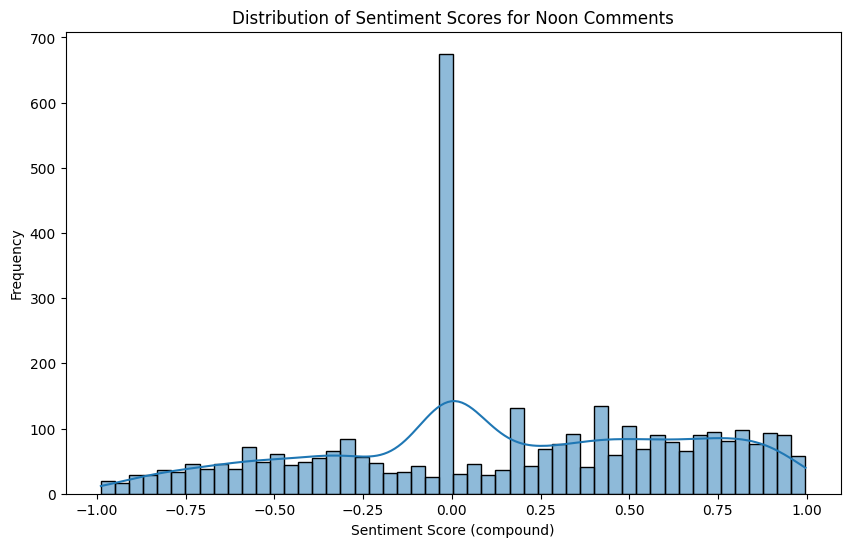

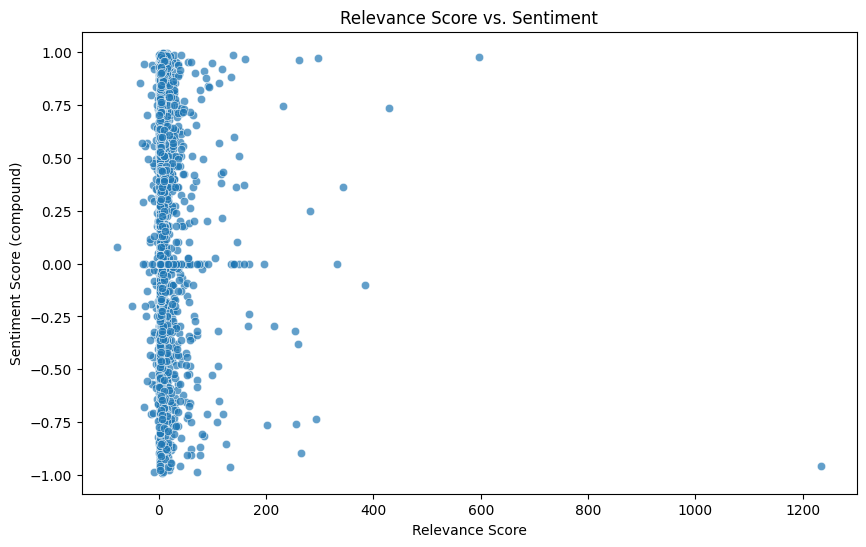

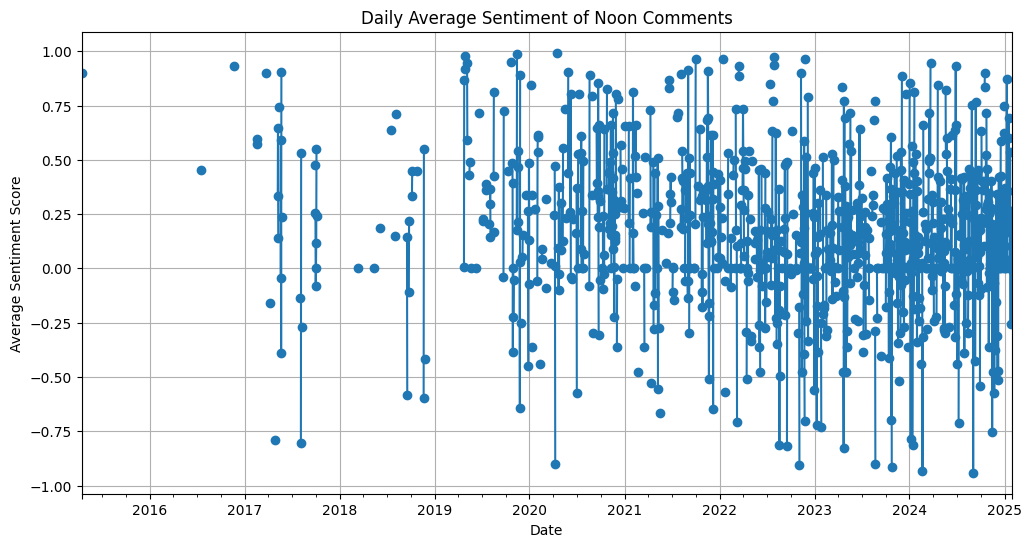

In [ ]:

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def compute_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    return sia.polarity_scores(text)['compound']

df['sentiment'] = df['comment_text'].apply(compute_sentiment)

# Display sentiment statistics
print("\nSentiment Statistics:")
print(df['sentiment'].describe())


# Visualize sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores for Noon Comments')
plt.xlabel('Sentiment Score (compound)')
plt.ylabel('Frequency')
plt.show()

print("\n \n")

# Scatter plot: Relevance Score vs. Sentiment
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='relevance_score', y='sentiment', alpha=0.7)
plt.title('Relevance Score vs. Sentiment')
plt.xlabel('Relevance Score')
plt.ylabel('Sentiment Score (compound)')
plt.show()

print("\n \n")

# Convert 'created_utc' to datetime and set as index for time series analysis
df['created_utc'] = pd.to_datetime(df['created_utc'])
df.set_index('created_utc', inplace=True)

# Resample by day and compute average sentiment
daily_sentiment = df.resample('D')['sentiment'].mean()

plt.figure(figsize=(12,6))
daily_sentiment.plot(kind='line', marker='o')
plt.title('Daily Average Sentiment of Noon Comments')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
print("\n \n")

**Inference:** While the sentiment statistics for 3,598 comments (mean = 0.1453, median = 0.09, range from -0.989 to 0.9966) indicate a well-distributed mix of positive, neutral, and negative opinions—with a higher prevalence of positive comments—the relevance scores remain less scattered, but on detail analysis on individual comments with less relevance its established that the comments are more relevant to the Noon discussion in Reddit.

#### Word Cloud Visualization of Noon Comments

In this section, we generate a word cloud to visually summarize the key terms in the Reddit comments related to Noon. The process involves:

- **Combining Comments:** All comments are concatenated into a single text string.
- **Stopword Removal:** Common stopwords and the keyword "noon" are removed to highlight other relevant terms.
- **Word Cloud Generation:** The WordCloud library is used to create a visual representation of the most frequent words.

This visualization helps quickly identify the predominant topics and themes in the discussions.

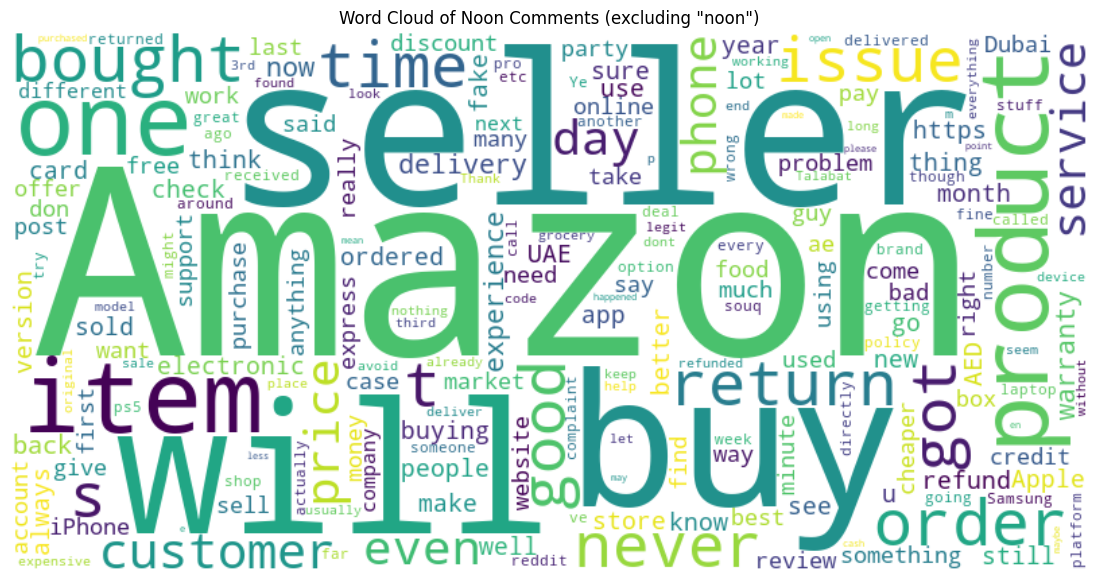

In [ ]:
# Combine all comments into one text string
text_combined = ' '.join(df['comment_text'].dropna().tolist())

# Define stopwords and optionally remove "noon" to see other terms
stopwords = set(STOPWORDS)
stopwords.update(['noon', 'Noon'])

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, collocations=False).generate(text_combined)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Noon Comments (excluding "noon")')
plt.show()

#### Topic Modeling with LDA

In this section, we perform topic modeling on the Reddit comments to uncover latent themes.

The steps include:
- **Filtering:** Remove very short comments (less than 5 words) to ensure quality input.
- **Vectorization:** Convert the text data into a document-term matrix using CountVectorizer with English stopwords.
- **Modeling:** Apply Latent Dirichlet Allocation (LDA) to extract 5 topics.
- **Display:** Print the top 10 words for each topic to interpret the underlying themes.

This approach provides insight into the main discussion topics present in the comments.

In [ ]:

# Filter out very short comments for topic modeling
df_topic = df[df['comment_text'].str.split().apply(len) > 5].copy()

# Vectorize text using CountVectorizer with English stop words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_topic['comment_text'].dropna())

# Define the number of topics
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

print("\nIdentified Topics:")
for topic, words in topics.items():
    print(f"Topic {topic+1}: {', '.join(words)}")


Identified Topics:
Topic 1: card, like, aed, account, credit, cashback, use, app, pay, think
Topic 2: com, amazon, warranty, https, seller, version, bought, uae, got, www
Topic 3: amazon, order, time, delivery, like, just, food, app, minutes, good
Topic 4: amazon, buy, just, don, seller, buying, people, sellers, better, customer
Topic 5: bought, item, got, return, refund, seller, phone, just, amazon, ordered


#### **Conclusion**
In this analysis, we used a **keyword-based relevance score** to identify which comments are most likely related to Noon, followed by a **sentiment analysis** that revealed both positive and negative sentiments. The **time series plot** shows how average sentiment changes over time, while the **word cloud** highlights commonly discussed words (excluding "noon"). Finally, **topic modeling** uncovered several recurring themes within the comments.

Even though the relevance score might appear low for some comments, the variety of sentiment scores (including negative, neutral and highly positive values) indicates that these comments still hold valuable insights about Noon. The detail analysis of the comments state that the comments are relevant to noon company review but the keywords might not be used to explicitly call out the match. Manual verification has been done on the data extracted to conclude on the relevance of comment to noon company. Therefore, this dataset is a suitable starting for further sentiment analysis model training and testing.

#### **Reference**
Hutto, C.J. and Gilbert, E. (2014) ‘VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text’, in Proceedings of the Eighth International Conference on Weblogs and Social Media (ICWSM-14), Ann Arbor, MI, pp. 216–225.

Rehurek, R. and Sojka, P. (2010) ‘Software Framework for Topic Modelling with Large Corpora’, in Proceedings of the LREC 2010 Workshop on New Challenges for NLP Frameworks, Valletta, Malta, May 2010.

Müller, A. (2014) word_cloud [Software]. Available at: https://github.com/amueller/word_cloud (Accessed: 27 April 2025).



---


### **Section B: Labelling**



#### **3-Class Sentiment Analysis and Dataset Balancing Pipeline**

This notebook implements a complete pipeline for sentiment analysis using a 3-class model (Negative, Neutral, Positive). The key steps are as follows:

1. **Data Preprocessing:**  
   - Reads raw comment data from a CSV file.

2. **Sentiment Analysis:**  
   - Uses multiple sentiment analyzers: VADER, TextBlob, Flair, RoBERTa, and Longformer.
   - Each method outputs a sentiment signal ("Positive", "Negative", or "Neutral").
   - A majority vote over these six signals is used to assign a final 3-class sentiment label:
     - If the number of "Positive" signals exceeds "Negative" signals, label as **Positive**.
     - If the number of "Negative" signals exceeds "Positive" signals, label as **Negative**.
     - Otherwise, label as **Neutral**.

3. **Dataset Balancing:**  
   - The original dataset is skewed (e.g., many Neutral samples and few Negative samples).
   - The pipeline balances the data by sampling an equal number of examples from each sentiment group.

4. **Visualization:**  
   - Displays the original and balanced class distributions using count plots.
   - These visualizations help verify that the final balanced dataset has equal representation of all three classes.

5. **Outcome:**  
   - The final balanced dataset is ready for further modeling or analysis.

**Reference: **
  
  Dietterich, T.G. (2000) ‘Ensemble Methods in Machine Learning’, in Multiple Classifier Systems, Lecture Notes in Computer Science, vol. 1857, pp. 1–15. Springer.

  Rokach, L. (2010) ‘Ensemble-based Classifiers’, Artificial Intelligence Review, 33(1-2), pp. 1–39.



Started sentiment analysis...

Vader completed

Sentiment_TextBlob completed

Sentiment_Flair completed

Sentiment_RoBERTa completed

Sentiment_Longformer completed

Sentiment_Adjusted completed
Sentiment analysis complete. Sample:

Original distribution by sentiment_group:
sentiment_group
Negative    1594
Positive    1469
Neutral      535
Name: count, dtype: int64

Balanced dataset created with 1605 samples (535 per group)
Balanced distribution:
sentiment_group
Negative    535
Neutral     535
Positive    535
Name: count, dtype: int64


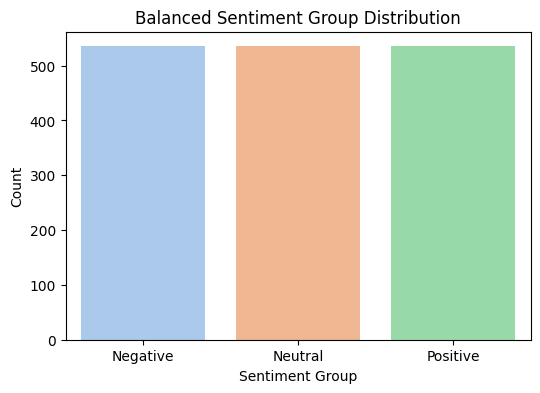

In [ ]:
# ---------------------------------
# Sentiment Analysis & Sentiment Generation
# ---------------------------------
# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()
flair_analyzer = flair.models.TextClassifier.load('en-sentiment')
roberta_classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
longformer_classifier = pipeline("sentiment-analysis", model="allenai/longformer-base-4096")

# Customize VADER lexicon
new_words = {
    "falsely advertised": -3.0,
    "overheating": -3.0,
    "returned": -2.0,
    "refunds": -1.5,
    "fortunate": 0.5
}
vader_analyzer.lexicon.update(new_words)

def get_vader_sentiment(text):
    if not isinstance(text, str):
        return "Neutral"
    score = vader_analyzer.polarity_scores(text)['compound']
    return "Negative" if score <= -0.05 else "Positive" if score >= 0.05 else "Neutral"

def get_textblob_sentiment(text):
    if not isinstance(text, str):
        return "Neutral"
    score = TextBlob(text).sentiment.polarity
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

def get_flair_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    sentence = flair.data.Sentence(text)
    flair_analyzer.predict(sentence)
    if not sentence.labels:
        return "Neutral"
    sentiment = sentence.labels[0].value
    return "Positive" if sentiment == 'POSITIVE' else "Negative" if sentiment == 'NEGATIVE' else "Neutral"

def get_roberta_sentiment(text, max_length=512, overlap=128):
    if not isinstance(text, str):
        return "Neutral"
    chunks = []
    i = 0
    while i < len(text):
        chunks.append(text[i:i+max_length])
        i += max_length - overlap
    sentiment_scores = {"Positive": 0, "Negative": 0, "Neutral": 0}
    for chunk in chunks:
        result = roberta_classifier(chunk)[0]
        if result['label'] == 'LABEL_2':
            sentiment_scores["Positive"] += 1
        elif result['label'] == 'LABEL_0':
            sentiment_scores["Negative"] += 1
        else:
            sentiment_scores["Neutral"] += 1
    return max(sentiment_scores, key=sentiment_scores.get)

def get_longformer_sentiment(text, max_length=4096, overlap=512):
    if not isinstance(text, str):
        return "Neutral"
    chunks = []
    i = 0
    while i < len(text):
        chunks.append(text[i:i+max_length])
        i += max_length - overlap
    sentiment_scores = {"Positive": 0, "Negative": 0, "Neutral": 0}
    for chunk in chunks:
        result = longformer_classifier(chunk)[0]
        label = result['label']
        if "pos" in label.lower():
            sentiment_scores["Positive"] += 1
        elif "neg" in label.lower():
            sentiment_scores["Negative"] += 1
        else:
            sentiment_scores["Neutral"] += 1
    return max(sentiment_scores, key=sentiment_scores.get)

def get_adjusted_sentiment(text):
    negative_keywords = ["falsely advertised", "overheating", "returned", "refund", "issue"]
    positive_keywords = ["fortunately", "buy a new one"]
    neg_count = sum(1 for word in negative_keywords if word in text.lower())
    pos_count = sum(1 for word in positive_keywords if word in text.lower())
    # Revised logic: Use majority vote of the six signals.
    if pos_count >= 4:
        return "Positive"
    elif neg_count >= 4:
        return "Negative"
    else:
        return "Neutral"

file_path = "https://github.com/HWhr3000/F12AA_TextAnalystics/raw/main/Data/processed/Final_Noon_Datasets.csv"
df = pd.read_csv(file_path)

print("\nStarted sentiment analysis...")
df['Sentiment_VADER'] = df['comment_text'].apply(get_vader_sentiment)
print("\nVader completed")
df['Sentiment_TextBlob'] = df['comment_text'].apply(get_textblob_sentiment)
print("\nSentiment_TextBlob completed")
df['Sentiment_Flair'] = df['comment_text'].apply(get_flair_sentiment)
print("\nSentiment_Flair completed")
df['Sentiment_RoBERTa'] = df['comment_text'].apply(get_roberta_sentiment)
print("\nSentiment_RoBERTa completed")
df['Sentiment_Longformer'] = df['comment_text'].apply(get_longformer_sentiment)
print("\nSentiment_Longformer completed")
df['Sentiment_Adjusted'] = df['comment_text'].apply(get_adjusted_sentiment)
print("\nSentiment_Adjusted completed")

# Revised rating: use majority vote over the six sentiment signals.
def calculate_rating(row):
    signals = [
        row['Sentiment_VADER'],
        row['Sentiment_TextBlob'],
        row['Sentiment_Flair'],
        row['Sentiment_RoBERTa'],
        row['Sentiment_Longformer'],
        row['Sentiment_Adjusted']
    ]
    pos_count = signals.count("Positive")
    neg_count = signals.count("Negative")
    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Rating'] = df.apply(calculate_rating, axis=1)
print("Sentiment analysis complete. Sample:")
#print(df[['comment_text', 'processed_comment', 'Sentiment_Rating']].head())

# ---------------------------------
# Map to 3-Class Output and Balance the Dataset
# ---------------------------------
# Our target is the 3-class label from Sentiment_Rating.
df['sentiment_group'] = df['Sentiment_Rating']

print("\nOriginal distribution by sentiment_group:")
print(df['sentiment_group'].value_counts())

# Balance the dataset so that each group (Negative, Neutral, Positive) is equally represented.
group_counts = df['sentiment_group'].value_counts()
min_group_count = group_counts.min()
balanced_df = df.groupby('sentiment_group').apply(lambda x: x.sample(n=min_group_count, random_state=42)).reset_index(drop=True)
print(f"\nBalanced dataset created with {len(balanced_df)} samples ({min_group_count} per group)")
print("Balanced distribution:")
print(balanced_df['sentiment_group'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_group', data=balanced_df, palette='pastel')
plt.title("Balanced Sentiment Group Distribution")
plt.xlabel("Sentiment Group")
plt.ylabel("Count")
plt.show()




---


### Section B: Different ways to perform Sentiment Analysis </b></h2>
<b>1. Lexicon/rule based approach</b>
<br>It analyzes the sentiment based on predefined dictionaries of words and associated scores. TextBlob, VADER, MPQA, LIWC are the some ways of this approach </br>
<b>2. Machine Learning based appraoch</b>
<br>The ML models learn patterns from the sentence and associated sentiment, then predicts the sentiment for new text. The classification models like logistic regression, SVM, Random Forest, XGBoost or others can be used in this case</br>
<b>3. Deep Learning based approach </b>
<br> RNNs, LSTMs, Transformers(BERT, RoBERTAa, DistilBERT and others) and other sequential models can be used to capture the complex patterns of sequence in the text data. Transformers perform state of the art performance in this case</br>


Here we will explore in depth TextBlob, VADER and RoBERTa.

#### <b> Using TextBlob (sentiment lexicon):</b>

In [ ]:
# !pip install textblob
from textblob import TextBlob

def get_comment_polarity(comment):
    comment_text = str(comment)
    analysis = TextBlob(comment_text)
    polarity = analysis.sentiment.polarity
    return polarity

def get_polarity_label(polarity):
    label = ''
    if polarity == 0:
        label = 'neutral'
    elif polarity < 0.00:
        label = 'negative'
    elif polarity > 0.00:
        label = 'positive'
    return label

labelled_commentList_df = commentList_df.copy()


# First, calculate polarity scores
labelled_commentList_df['textBlob_polarity'] = labelled_commentList_df['comment_text'].apply(get_comment_polarity)

# Then, use these polarity scores to get labels
labelled_commentList_df['textBlob_label'] = labelled_commentList_df['textBlob_polarity'].apply(get_polarity_label)

# Display the DataFrame with the added textBlob columns
print(labelled_commentList_df[['comment_text', 'textBlob_polarity', 'textBlob_label']].head(20))

# Show distribution of sentiments
print("\nDistribution of sentiments:")
print(labelled_commentList_df['textBlob_label'].value_counts())

                                         comment_text  textBlob_polarity   
0                           will reach border by noon           0.000000  \
1   Be careful of blowing dust during late morning...          -0.042857   
2   Apart from boring things, you can managed. How...          -0.233333   
3   You are looking at a tag in noon app saying 1 ...           0.500000   
4   Are you sure? There's nothing indicating that ...           0.500000   
5   Warranty is given by OnePlus. Not Noon or Amaz...           0.000000   
6   I am aware of this, but Noon still offers a 12...           0.240000   
7   If you order from Noon, there is a chance you ...           0.300000   
8   It’s not Arabic it’s transliterated English: w...           0.000000   
9   Plot twist - noon did those mistakes on purpos...           0.000000   
10  This perfume shop guy told me it is 250 aed . ...          -0.250000   
11                          So noon must be og right?           0.285714   
12  The one 

#### <b> Using Vader (sentiment lexicon):</b>

In [ ]:
#!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(comment):
    sentiment_scores = analyzer.polarity_scores(comment)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    # Return both the sentiment label and the compound polarity score
    return sentiment, sentiment_scores['compound']

labelled_commentList_df = commentList_df.copy()
# Apply sentiment analysis to the 'textDisplay' column and create new columns for sentiment and polarity score
labelled_commentList_df[['vader_label', 'vader_polarity']] = labelled_commentList_df['comment_text'].apply(lambda text: pd.Series(analyze_sentiment(text)))

labelled_commentList_df.head()
# Show distribution of sentiments
print("\nDistribution of sentiments:")
print(labelled_commentList_df['vader_label'].value_counts())


Distribution of sentiments:
vader_label
Positive    1911
Negative     997
Neutral      690
Name: count, dtype: int64


#### <b> Using RoBERTa (sentiment lexicon):</b>

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from transformers import pipeline

# Removed emotions:
# "caring"

emotions = {
    "positive": ["desire","approval", "admiration", "gratitude", "optimism", "love", "relief", "joy", "pride", "excitement", "amusement", "curiosity"],
    "negative": ["disapproval", "disappointment", "annoyance", "sadness", "anger", "disgust", "embarrassment", "remorse", "grief", "fear", "nervousness"],
    "neutral": ["realization", "surprise", "neutral", "confusion"]
}

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
# List to store the sentiment analysis results
sentiment_results = []
comments = labelled_commentList_df['comment_text']
threshold = 0.1
truncate_count = 0;
max_seq_length = 512

# Define a function to truncate the input sequence
def truncate_sequence(sequence, max_length):
    global truncate_count
    if len(sequence) > max_length:
        truncate_count = truncate_count +1;
        return sequence[:max_length]
    else:
        return sequence

def get_score(emotion_label, emotion_array):
    for emotion_obj in emotion_array:
        if emotion_obj['label'] == emotion_label:
            return emotion_obj['score']
    return 0


# Iterate over the comments and analyze sentiment
for comment in comments:
    truncated_comment = truncate_sequence(comment, max_seq_length)
    # Analyze sentiment for the truncated comment
    emotion_scores = classifier(truncated_comment)
    positive_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["positive"])
    negative_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["negative"])
    neutral_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["neutral"])
    overall_polarity = "Neutral"
    if positive_score - negative_score > threshold:
        overall_polarity = "Positive"
    elif negative_score - positive_score > threshold:
        overall_polarity = "Negative"
    sentiment_results.append({
        'comment': comment,
    'roberta_emotion_scores': emotion_scores[0],
    'roberta_positive_score': positive_score,
    'roberta_negative_score': negative_score,
    'roberta_neutral_score': neutral_score,
    'roberta_label': overall_polarity})

sentiment_df = pd.DataFrame(sentiment_results)

# Drop the 'comment' column from sentiment_df
sentiment_df.drop(columns=['comment'], inplace=True)

# Merge the sentiment results DataFrame with the labelled_commentList_df DataFrame
labelled_commentList_df = pd.concat([labelled_commentList_df, sentiment_df], axis=1)
labelled_commentList_df.head()

# Show distribution of sentiments
print("\nDistribution of sentiments:")
print(labelled_commentList_df['roberta_label'].value_counts())

Device set to use cpu



Distribution of sentiments:
roberta_label
Positive    1702
Negative     954
Neutral      942
Name: count, dtype: int64


<h3><b> Save the sentiment analysed data to csv </b></h3>

In [ ]:
labelled_commentList_df.to_csv('sentiment_analyzed_data.csv', index=False)
print("Data saved successfully to sentiment_analyzed_data.csv")

Data saved successfully to sentiment_analyzed_data.csv


<h3><b> Import the sentiment analysed data</b></h3>

In [ ]:
import pandas as pd
labelled_commentList_df = pd.read_csv("./sentiment_analyzed_data.csv", header=0)



---


## **Section C: Text Analytics Pipeline**



---


### <b> Preprocessing the comments </b> </h1>

Transforming the raw data into appropriate format for further processing. Following preprocessing techniques have been used here:

 <b>1. Case folding: </b>
    All the words are converted to lower case.

 <b>2. Remove Non-Alphabetic Characters:</b>
    Removes all characters that are not letters and whitespaces.

 <b>3. Tokenization:</b>
   Breaking down the text into meaningful units based on a delimiter

 <b>4. Stop Word Removal:</b>
   Removing unnecesssary words or noise like on, and, the etc

 <b>5. Stemming:</b>
   Each word is replaced by its word stem using Porter Stemmer e.g used, using, used -> use

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

class TextPreprocessor:
    def __init__(self, en_nlp=None):
        # Download NLTK resources
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        # Initialize stemmer and stopwords
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english'))
        self.en_nlp = en_nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        # Apply stemming
        tokens = [self.stemmer.stem(token) for token in tokens]
        # Join tokens back into text
        return ' '.join(tokens)

# Create preprocessor instance
preprocessor = TextPreprocessor()

# Apply to dataframe
labelled_commentList_df['preprocessed_text'] = labelled_commentList_df['comment_text'].apply(preprocessor.preprocess_text)

print("Original vs Preprocessed text:")
print(labelled_commentList_df[['comment_text', 'preprocessed_text']].head())

Original vs Preprocessed text:
                                        comment_text   
0                          will reach border by noon  \
1  Be careful of blowing dust during late morning...   
2  Apart from boring things, you can managed. How...   
3  You are looking at a tag in noon app saying 1 ...   
4  Are you sure? There's nothing indicating that ...   

                                   preprocessed_text  
0                                  reach border noon  
1  care blow dust late morn noon sand heat rout a...  
2  apart bore thing manag howev light pole road b...  
3  look tag noon app say year warranti say noon g...  
4  sure there noth indic read noon warranti polic...  




---


###  <b> Vector space representation: </b>

In this block, various method used for vector space representation to mathematically represent the comments are mentioned:
<br><b>1.Binary vector </b>
<br><b>2.Term Frequency - TF </b>
<br><b>3.Term Frequency-Inverse Document Frequency (TF-IDF) unigram </b>
<br><b>4.Term Frequency-Inverse Document Frequency (TF-IDF) bigram</b>


The vector representation of comments in each of the above-mentioned methods has been stored as different CSV files and can be viewed from the below link:
https://heriotwatt-my.sharepoint.com/my?id=%2Fpersonal%2Fpy2010%5Fhw%5Fac%5Fuk%2FDocuments%2FVectorFiles

#### <b> Vector Space Representation - Binary Vector </b><

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for binary representation
binary_vectorizer = CountVectorizer(binary=True, token_pattern=r'\b[a-zA-Z]+\b')

# Fit and transform using the preprocessed_text column
X_binary = binary_vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

# Get feature names
feature_names = binary_vectorizer.get_feature_names_out()

# Create DataFrame with binary vectors
binary_df = pd.DataFrame(X_binary.toarray(), columns=feature_names)

# Save to CSV
binary_df.to_csv('vector_binary.csv', index=False, encoding='utf-8')

# Print shape and first few rows
print("Shape of binary vector representation:", binary_df.shape)
print("\nFirst few rows and columns of binary representation:")
print(binary_df.iloc[:5, :10])  # Show first 5 rows and 10 columns

Shape of binary vector representation: (3598, 5792)

First few rows and columns of binary representation:
   a  aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin
0  0   0       0    0      0      0     0     0    0       0
1  0   0       0    0      0      0     0     0    0       0
2  0   0       0    0      0      0     0     0    0       0
3  0   0       0    0      0      0     0     0    0       0
4  0   0       0    0      0      0     0     0    0       0


#### <b>Vector Space Representation - Frequency Count </b>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')

X = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

feature_names = vectorizer.get_feature_names_out()

count_df = pd.DataFrame(X.toarray(), columns=feature_names)

count_df.to_csv('frequency_count.csv', index=False, encoding='utf-8')

print(count_df)

      a  aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin  ...  zero  \
0     0   0       0    0      0      0     0     0    0       0  ...     0   
1     0   0       0    0      0      0     0     0    0       0  ...     0   
2     0   0       0    0      0      0     0     0    0       0  ...     0   
3     0   0       0    0      0      0     0     0    0       0  ...     0   
4     0   0       0    0      0      0     0     0    0       0  ...     0   
...  ..  ..     ...  ...    ...    ...   ...   ...  ...     ...  ...   ...   
3593  0   0       0    0      0      0     0     0    0       0  ...     0   
3594  0   0       0    0      0      0     0     0    0       0  ...     0   
3595  0   0       0    0      0      0     0     0    0       0  ...     0   
3596  0   0       0    0      0      0     0     0    0       0  ...     0   
3597  0   0       0    0      0      0     0     0    0       0  ...     0   

      zeroohm  zillion  zip  ziplin  zomato  zomatotalabatcaree

#### <b> Vector Space Representation - TF-IDF(Unigram) </b>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b')

X_tfidf = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

feature_names_tfidf = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names_tfidf)

tfidf_df.to_csv('tfidf.csv', index=False, encoding='utf-8')

print(tfidf_df)

        a   aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin  ...  zero  \
0     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
1     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
2     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
4     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
...   ...  ...     ...  ...    ...    ...   ...   ...  ...     ...  ...   ...   
3593  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3594  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3595  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3596  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3597  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   

      zeroohm  zillion  zip

#### <b>Vector Space Representation TF-IDF(Bigram) </b>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b', ngram_range=(2, 2))

X_tfidf = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

feature_names_tfidf = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names_tfidf)

tfidf_df.to_csv('tfidf_bigram.csv', index=False, encoding='utf-8')

print(tfidf_df)

      a a  a addit  a almost  a also  a alway  a amazon  \
0     0.0      0.0       0.0     0.0      0.0       0.0   
1     0.0      0.0       0.0     0.0      0.0       0.0   
2     0.0      0.0       0.0     0.0      0.0       0.0   
3     0.0      0.0       0.0     0.0      0.0       0.0   
4     0.0      0.0       0.0     0.0      0.0       0.0   
...   ...      ...       ...     ...      ...       ...   
3593  0.0      0.0       0.0     0.0      0.0       0.0   
3594  0.0      0.0       0.0     0.0      0.0       0.0   
3595  0.0      0.0       0.0     0.0      0.0       0.0   
3596  0.0      0.0       0.0     0.0      0.0       0.0   
3597  0.0      0.0       0.0     0.0      0.0       0.0   

      a amazonaehttpsamazona  a amazoncom  a amazonnoon  a anoth  ...  \
0                        0.0          0.0           0.0      0.0  ...   
1                        0.0          0.0           0.0      0.0  ...   
2                        0.0          0.0           0.0      0.0  ...   



---


### <b> Pipeline:</b>
The pipeline automates the following tasks in a Text Analytics process <b>PREPROCESSING -> VECTORISATION -> CLASSIFICATION</b>
<br>To build a Text analytic pipeline, the pre-processed comments are represented by 3 different vector representation methods, as mentioned below:
<br><b>1.	Using both countVectorizer and tfidfVectorizer</b>
<br><b>2.	Using only countVectorizer</b>
<br><b>3.	Using only tfidfVectorizer</b>

These vector space represented text are then passed through different classifiers to compare and analyse the models. In our experiments we used the following three classifiers:
<br><b>1.	Logistic Regression</b>
<br><b>2.	Support Vector Machine (SVM)</b>
<br><b>3.	Naïve bayes</b>

#### <b> 1. Using both countVectorizer and tfidf: </b>
In the pipeline different parameters were varied like binary and max_df for countVectorizer, ngram_range and max_df for tfidfVectorizer. The max_df for both vectorizers were 0.20, 0.50, and 1.0. On tuning the hyperparameters, GridSerachCV is performed to find the best parameters and score from these combinations for each of the classifiers are displayed. Classification report and confusion matrix are also extracted for the best models.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for CountVectorizer
count_vectorizer_params = {
    'binary': [True, False],
    'max_df': [0.20, 0.50, 1.0]
}

# Define parameters for TfidfVectorizer
tfidf_vectorizer_params = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigram, bigram, trigram
    'max_df': [0.20, 0.50, 1.0]
}

# Define classifiers(Logistic Regression, SVN and NB)
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Define features using FeatureUnion
features = FeatureUnion([
    ('frequency_count', CountVectorizer()),
    ('tfidf_vectorizer', TfidfVectorizer())
])

# Define hyperparameters grid
param_grid = {
    'features__frequency_count__binary': count_vectorizer_params['binary'],
    'features__frequency_count__max_df': count_vectorizer_params['max_df'],
    'features__tfidf_vectorizer__ngram_range': tfidf_vectorizer_params['ngram_range'],
    'features__tfidf_vectorizer__max_df': tfidf_vectorizer_params['max_df']
}


comments = labelled_commentList_df['comment_text']
labels =  labelled_commentList_df['textBlob_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('features', features),
        ('clf', classifier)
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 1.0, 'features__tfidf_vectorizer__max_df': 0.5, 'features__tfidf_vectorizer__ngram_range': (1, 2)}
Best score: 0.7539939613526571

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.53      0.57       154
     neutral       0.74      0.83      0.78       200
    positive       0.81      0.80      0.80       366

    accuracy                           0.75       720
   macro avg       0.72      0.72      0.72       720
weighted avg       0.75      0.75      0.75       720


Confusion Matrix:
[[ 82  22  50]
 [ 14 166  20]
 [ 38  37 291]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 0.5, 'features__tfi

#### <b> 2. Using only countVectorizer: </b>
In this pipeline, only countVectorizer method is used and the max_df were 0.2, 0.5 and 1. We followed the same steps as the first pipeline above to get the best results for the three classifiers

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for CountVectorizer
count_vectorizer_params = {
    'binary': [True, False],
    'max_df': [0.20, 0.50, 1.0]
}


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}


# Define TextPreprocessor
preprocessor = TextPreprocessor()

# Define hyperparameters grid
param_grid = {
    'frequency_count__binary': count_vectorizer_params['binary'],
    'frequency_count__max_df': count_vectorizer_params['max_df'],
    }

comments = labelled_commentList_df['comment_text']
labels =  labelled_commentList_df['textBlob_label']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('frequency_count', CountVectorizer()),
        ('clf', classifier)
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'frequency_count__binary': True, 'frequency_count__max_df': 0.5}
Best score: 0.7498266908212561

Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.56      0.60       154
     neutral       0.75      0.84      0.79       200
    positive       0.82      0.80      0.80       366

    accuracy                           0.76       720
   macro avg       0.73      0.73      0.73       720
weighted avg       0.76      0.76      0.76       720


Confusion Matrix:
[[ 87  20  47]
 [ 13 168  19]
 [ 38  37 291]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'frequency_count__binary': True, 'frequency_count__max_df': 0.2}
Best score: 0.6879746376811595

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.27     

#### <b> 3. Using only tfidf: </b>
This pipeline used only tfidfVectorizer and different parameters were varied like ngram_range [ unigram, bigram, and trigram] and max_df [0.2,0.5, 1.0]. Similar to the other pipelines, these hyperparameters were tuned and GridSerachCV was performed to obtain the best model.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for TfidfVectorizer
tfidf_vectorizer_params = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigram, bigram, trigram
    'max_df': [0.20, 0.50, 1.0]
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}


# Define hyperparameters grid
param_grid = {
    'tfidf_vectorizer__ngram_range': tfidf_vectorizer_params['ngram_range'],
    'tfidf_vectorizer__max_df': tfidf_vectorizer_params['max_df']
}

comments = labelled_commentList_df['comment_text']
labels =  labelled_commentList_df['textBlob_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('clf', classifier)
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'tfidf_vectorizer__max_df': 0.2, 'tfidf_vectorizer__ngram_range': (1, 1)}
Best score: 0.7175054347826086

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.38      0.51       154
     neutral       0.74      0.61      0.67       200
    positive       0.69      0.90      0.79       366

    accuracy                           0.71       720
   macro avg       0.73      0.63      0.65       720
weighted avg       0.72      0.71      0.69       720


Confusion Matrix:
[[ 59  17  78]
 [ 10 122  68]
 [  9  26 331]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'tfidf_vectorizer__max_df': 1.0, 'tfidf_vectorizer__ngram_range': (1, 1)}
Best score: 0.6817185990338164

Classification Report:
              precision    recall  f1-score   support

    negative       0



---


### Model Comparison




#### **Graph Comparison**
<b> Graph comparison of all three classifiers based on Accuracy and F1 Score: Logistic Regression, SVN and NB</b>

Summarizing the results from these pipelines to inspect and compare these models based on their performance.

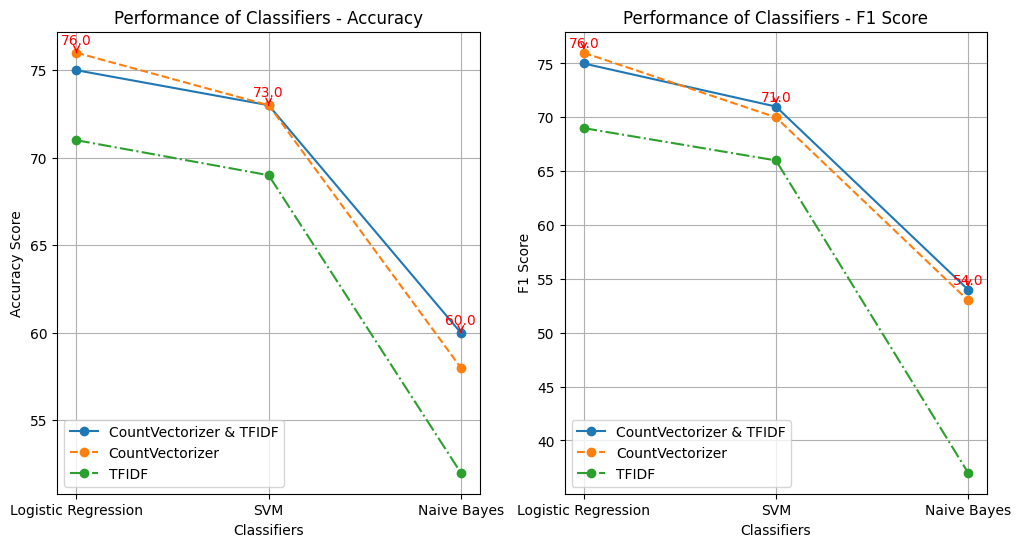

In [ ]:
import matplotlib.pyplot as plt

# Define classifier names and corresponding scores
classifier_names = ['Logistic Regression', 'SVM', 'Naive Bayes']
acc_count_tfidf_line = [75, 73, 60]
acc_count_line = [76, 73, 58]
acc_tfidf_line = [71, 69, 52]

f1_count_tfidf_line = [75, 71, 54]
f1_count_line = [76, 70, 53]
f1_tfidf_line = [69, 66, 37]

# Find the top scores for each classifier
acc_top_scores = [max(scores) for scores in zip(acc_count_tfidf_line, acc_count_line, acc_tfidf_line)]
f1_top_scores = [max(scores) for scores in zip(f1_count_tfidf_line, f1_count_line, f1_tfidf_line)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (Accuracy)
axs[0].plot(classifier_names, acc_count_tfidf_line, label='CountVectorizer & TFIDF', marker='o', linestyle='-')
axs[0].plot(classifier_names, acc_count_line, label='CountVectorizer', marker='o', linestyle='--')
axs[0].plot(classifier_names, acc_tfidf_line, label='TFIDF', marker='o', linestyle='-.')

# Add labels and title for the first graph
axs[0].set_xlabel('Classifiers')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Performance of Classifiers - Accuracy')
axs[0].legend()  # Show legend
axs[0].grid(True)  # Show grid

# Highlight top scores
for classifier, score in zip(classifier_names, acc_top_scores):
    max_index = acc_top_scores.index(score)
    axs[0].annotate(f'{score:.1f}', xy=(classifier_names.index(classifier), score), xytext=(classifier_names.index(classifier), score + 0.5),
                    arrowprops=dict(color='red', arrowstyle='->'), fontsize=10, ha='center', color='red')

# Plot the second graph (F1 Score)
axs[1].plot(classifier_names, f1_count_tfidf_line, label='CountVectorizer & TFIDF', marker='o', linestyle='-')
axs[1].plot(classifier_names, f1_count_line, label='CountVectorizer', marker='o', linestyle='--')
axs[1].plot(classifier_names, f1_tfidf_line, label='TFIDF', marker='o', linestyle='-.')

# Add labels and title for the second graph
axs[1].set_xlabel('Classifiers')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('Performance of Classifiers - F1 Score')
axs[1].legend()  # Show legend
axs[1].grid(True)  # Show grid

# Highlight top scores
for classifier, score in zip(classifier_names, f1_top_scores):
    max_index = f1_top_scores.index(score)
    axs[1].annotate(f'{score:.1f}', xy=(max_index, score), xytext=(max_index, score + 0.5),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, ha='center', color='red')


plt.show()


#### **Table Comparison**
<b> Table comparision of all Classifiers(Logistic Regression, SVN and NB) based on Accuracy and F1 score </b>

In [ ]:
# Create the dataframe for accuracy scores of all 3 classifiers
df_accuracy = pd.DataFrame([
    [75, 76, 71],
    [73, 73, 69],
    [60, 58, 52],
], index=pd.Index(['Logistic Regression', 'SVM', 'Naive Bayes']),
   columns=pd.MultiIndex.from_product([['CountVectorizer & TFIDF', 'CountVectorizer', 'TFIDF']]))
df_accuracy.style

# Create the dataframe for f1 score scores of all 3 classifiers
df_f1 = pd.DataFrame([
    [75, 76, 69],
    [71, 70, 66],
    [54, 53, 37],
], index=pd.Index(['Logistic Regression', 'SVM', 'Naive Bayes']),
   columns=pd.MultiIndex.from_product([['CountVectorizer & TFIDF', 'CountVectorizer', 'TFIDF']]))


s_accuracy = df_accuracy.style
s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col1',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row1.col0',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row1.col1',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row2.col0',  'props': 'background-color: green; color: white'}
], overwrite=False)
s_accuracy.set_caption("Comparison of classifiers performance - Accuracy") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: white; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)



<h3><b>The highlighted cells in green displays the highest accuracy for each classifier</b></h3>

In [ ]:
s_f1.set_table_styles([cell_hover, index_names, headers])
s_f1.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col1',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row1.col0',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row2.col0',  'props': 'background-color: green; color: white'}
], overwrite=False)

s_f1.set_caption("Comparison of classifiers performance - F1 Score") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: white; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)


<h3><b>The highlighted cells in green displays the highest F1-score for each classifier</b></h3>



---


### **Obervation & Conclusion**
<h3><b>Observations from the Text Analytic Pipeline</b></h3>

1. <b>Logistic Regression</b> with <b>only Count Vectoriser and both (Count Vectorizer & tfIDF</b>) performed the best for our data. The accuracy and F1 score reached approx <b>76% </b> with <b>only Count Vecorizer</b>. And, for positive comments the F1 score was almost <b>80%</b> both with Logistic Regression and SVN.
2.The best parameters for <b>CountVectorizer</b> alone were <b>binary = True</b> with <b>max_df = 0.5</b>. When using the <b>combination of CountVectorizer and TfidfVectorizer</b>, the accuracy was <b>75%</b> with the best parameters being <b>binary = True</b> and <b>max_df = 1.0</b> for <b></b>, and <b>max_df = 0.5 </b> with <b>bigram representation (ngram_range=(1,2))</b> for <b>TfidfVectorizer</b>..
3. Naive Bayes performance was the worst for all the scenarios
4. The pipeline with <b>both Count Vectorizer and tfIDF </b> took the maximum time to run for obvious reasons.
5. The results of other Lexicon approaches like Vader was a little lesser for similar pipeline set up. A detailed analysis with Vader and RoBERTa was done.
6.We attempted to balance the class distribution by applying undersampling techniques to evaluate their impact on model performance. However, this approach did not yield improved results, likely due to the relatively limited size of our dataset




---


## **Section D: Visulization and Insights**



---


###<b> Top 20 postive comments(WordCloud) </b>

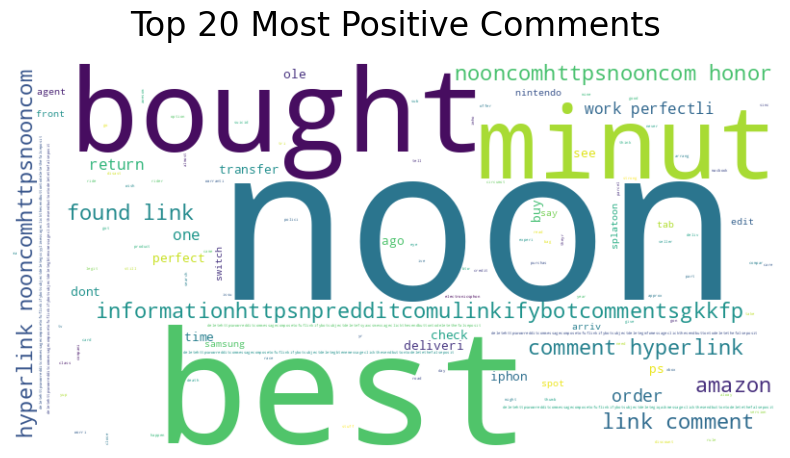


Sample Most Positive Comments (with polarity scores):
                                           comment_text  textBlob_polarity
696   I bought my PS5, Samsung Tab S8+ and Nintendo ...                1.0
1241  It is. Also it says it is returnable so you ca...                1.0
3103  **I found links in your comment that were not ...                1.0


In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter comments where textBlob_label is "positive"
positive_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'positive']

# Sort by textBlob_polarity in descending order and select top 20 comments
top_positive = positive_comments.sort_values(by='textBlob_polarity', ascending=False).head(20)

# Concatenate the top 20 positive comments
positive_text = ' '.join(top_positive['preprocessed_text'])

# Generate word cloud for positive comments
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Most Positive Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample positive comments with their polarity scores
print("\nSample Most Positive Comments (with polarity scores):")
print(top_positive[['comment_text', 'textBlob_polarity']].head(3))

<b>On manual review of the top 20 positive comments, we understood that the top positive words such as "noon", "bought" & "best". ALl were positive comments talking about the delivery or products. We found out that Noon minutes is the best service.</b>



---


### <b> Top 20 Negative comments(WordCloud) </b>

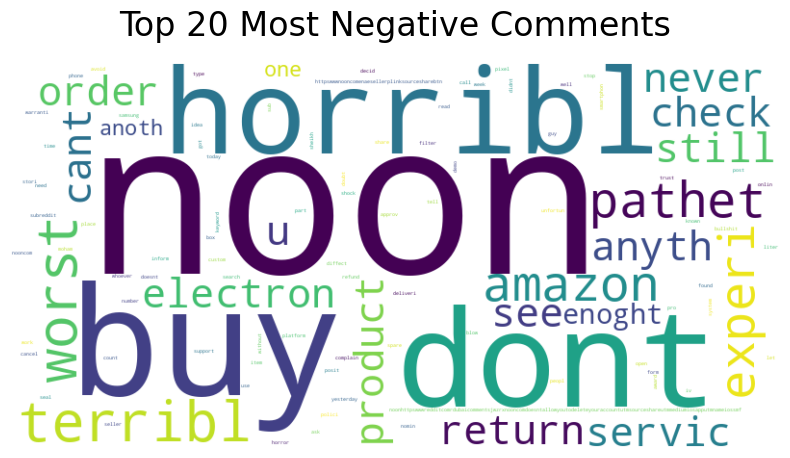


Sample Most Negative Comments (with polarity scores):
                                           comment_text  textBlob_polarity
2973  Another one from [Noon](https://www.reddit.com...               -1.0
967              Noon is terrible. Don't buy from there               -1.0
1614  Tell me about it, stopped buying from noon aft...               -1.0


In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter comments where textBlob_label is "negative"
negative_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'negative']

# Sort by textBlob_polarity in ascending order to get most negative first
top_negative = negative_comments.sort_values(by='textBlob_polarity', ascending=True).head(20)

# Concatenate the top 20 negative comments
negative_text = ' '.join(top_negative['preprocessed_text'])

# Generate word cloud for negative comments
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Most Negative Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample negative comments with their polarity scores
print("\nSample Most Negative Comments (with polarity scores):")
print(top_negative[['comment_text', 'textBlob_polarity']].head(3))

<b>On manual review we found out that the top negative words were "horrible", "noon", "worst", "dont", "pathetic" etc. The negative words are related to comments where users are not happy with the service or the product. In one of the negative comment we learnt that the user is not happy with warranty service of a smartphone and it does not work.</b>



---


### <b> Top 20 Neutral comments(WordCloud) </b>

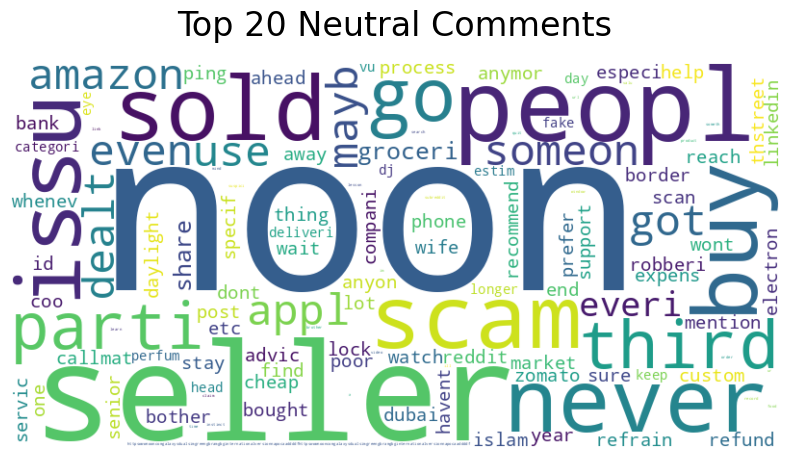


Sample Neutral Comments (with polarity scores):
                                           comment_text  textBlob_polarity
0                             will reach border by noon                0.0
2138  If its sold by noon go ahead. If its sold by t...                0.0
2140  Don't cheap out on an apple watch. Especially ...                0.0


In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter comments where textBlob_label is "neutral"
neutral_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'neutral']

# Sort by textBlob_polarity
top_neutral = neutral_comments.sort_values(by='textBlob_polarity', ascending=True).head(20)

# Concatenate the top 20 neutral comments
neutral_text = ' '.join(top_neutral['preprocessed_text'])

# Generate word cloud for neutral comments
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Neutral Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample neutral comments with their polarity scores
print("\nSample Neutral Comments (with polarity scores):")
print(top_neutral[['comment_text', 'textBlob_polarity']].head(3))

<b>On manual review of the top 20 neutral comments, we comprehended that the top neutral comments like "noon", "seller","people", "never" etc were mostly about the third party seller issues. Also, one of the neutral comments "will reach order by noon" is talking about noon from the delivery time perspective.</b>




---


### <b> pyLDAvis </b>

pyLDAvis is a tool that facilitates the interpretation of topics derived from a topic model applied to a text corpus. It extracts relevant information from a fitted LDA model and presents it through an interactive web-based visualization.

In our analysis, we utilized LDA to visualize the topics present in our Noon comments dataset, using parameters of `max_features=5000` and `max_df=0.20`. The main components of the LDA visualization are summarized below:

- **Intertopic Distance Map:**  
  The area of each circle is proportional to the number of words associated with that topic.

- **Bar Chart:**  
  By default, the chart displays the 30 most relevant terms for a selected topic.

- **Saliency Metric:**  
  This metric indicates how informative a word is in distinguishing a particular topic across the entire text collection. Higher saliency values suggest that a term is especially useful for identifying a specific topic.

- **Topic-Specific Frequency:**  
  A darker overlay on the overall frequency bar shows how frequently a term appears within the selected topic.

- **Lambda Parameter (Relevance Metric):**  
  Adjusting the lambda value affects word ranking: values near 0 surface rare, exclusive terms for the topic, while values closer to 1 emphasize more common words that may not be unique to the topic.

Reference:

Sievert, C. and Shirley, K.E. (2014) ‘LDAvis: A method for visualizing and interpreting topics’, in Proceedings of the Workshop on Interactive Language Learning, Visualization, and Interfaces (ILLVI), Baltimore, MD, 26 June 2014. Available at: https://github.com/cpsievert/LDAvis (Accessed: [Date]).

In [ ]:
!pip uninstall -y pyLDAvis pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [ ]:
# Install compatible versions
!pip install pandas==2.0.0
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 26.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.0 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.0 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.0 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.0 MB/s eta 0:00:00


In [ ]:
#!pip install pyLDAvis
#!pip install pandas==1.5.3
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings

In [ ]:
import pyLDAvis.gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
from IPython.display import HTML
import warnings

# For all comments
vectorizer = CountVectorizer(stop_words='english', max_features=5000, max_df=0.20)
text_data = labelled_commentList_df['comment_text'].values.astype('U')
dtm = vectorizer.fit_transform(text_data)

# Convert to gensim format
corpus = Sparse2Corpus(dtm, documents_columns=False)
id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Fit LDA model
lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=0)

# Prepare visualization
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

prepared_vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)

# Display title and visualization
display(HTML('<h1 style="font-size:24px;text-align:center;">Topic Modelling For All Comments</h1>'))
pyLDAvis.display(prepared_vis)

In [ ]:
topics = lda.show_topics()
for topic in topics:
    print(topic)

(0, '0.014*"just" + 0.011*"seller" + 0.010*"bought" + 0.010*"got" + 0.008*"ve" + 0.008*"buy" + 0.007*"order" + 0.007*"don" + 0.007*"product" + 0.007*"experience"')
(1, '0.010*"day" + 0.009*"card" + 0.008*"like" + 0.008*"order" + 0.008*"delivery" + 0.007*"grocery" + 0.006*"just" + 0.006*"credit" + 0.006*"food" + 0.006*"time"')
(2, '0.013*"just" + 0.013*"don" + 0.011*"buy" + 0.008*"good" + 0.007*"uae" + 0.007*"version" + 0.007*"aed" + 0.007*"think" + 0.006*"souq" + 0.006*"know"')
(3, '0.011*"seller" + 0.009*"like" + 0.009*"delivery" + 0.008*"buy" + 0.008*"items" + 0.008*"customer" + 0.007*"item" + 0.007*"warranty" + 0.007*"return" + 0.007*"service"')
(4, '0.032*"com" + 0.021*"https" + 0.013*"www" + 0.010*"got" + 0.010*"seller" + 0.007*"bought" + 0.007*"good" + 0.006*"ae" + 0.006*"en" + 0.006*"uae"')


### <b> Insights from the Visualisation </b>

<b> Intertopic distance</b>: Topic 4 and 5 are far apart from topic 1, 2 and 3. This indicates less similarity in theme/ context, shared terms and frequncy of shared terms.

<b> Overlapping Bubbles in the scatter plot </b>: Topics 1 & 2 and Topics 1 & 3 are overlapping indicating they have similar terms. On closer examination we found that Topics 1 & 3  are talking about similar terms like warranty, service, return and Topics 1 & 2 talk about similar context like seller issues.

<b>Size of the bubble</b>: Represents the prelavance of that topic in the corpus. Bubble 1 being the largest indicates the importance or relavance of this topic in this entire document.



---



## **Section E: Disucsssion and Conclusion from experiments**

On analyzing the Reddit comments about Noon, it was observed that users generally express positive sentiments toward the company. To prepare the data for analysis, preprocessing techniques including tokenization, stop word removal, case-folding, and stemming were applied. The comments were labeled using three sentiment analysis approaches: TextBlob, VADER, and RoBERTa (a pre-trained model from Hugging Face library).

For representing text features, various methods were explored including Binary vector, Term Frequency (TF), TF-IDF unigram, and TF-IDF bigram. These representations were tested with three different classifiers: <b>Logistic Regression, SVM, and Naive Bayes</b>.

On evaluating the pipeline, the best classifier was consistently **Logistic Regression** across all text representation methods. The most effective representation was using only <b>CountVectorizer</b>, achieving an accuracy of <b>76%</b> and a <b>positive class F1-score of 80% </b> with TextBlob labels. The best parameters for <b>CountVectorizer</b> alone were <b>binary = True</b> with <b>max_df = 0.5</b>. When using the <b>combination of CountVectorizer and TfidfVectorizer</b>, the accuracy was <b>75%</b> with the best parameters being <b>binary = True</b> and <b>max_df = 1.0</b> for <b></b>, and <b>max_df = 0.5 </b> with <b>bigram representation (ngram_range=(1,2))</b> for <b>TfidfVectorizer</b>..

Interestingly, despite RoBERTa being a sophisticated transformer model and having more balanced sentiment analysis, the simpler lexicon-based approaches (TextBlob and VADER) performed better in classifying sentiments from Reddit comments. TextBlob achieved the highest performance with 76% accuracy using only CountVectorizer, while RoBERTa's performance was lower with the same representation.
Possible reason could be too context sensitive compared to simpler approaches like Text Blob/Vader and data skewed more towards positive cases. Oversampling with SMOTE/SMOTEEN could provide more insights and better results.

Manual review of the word clouds revealed that positive comments primarily focused on Noon's delivery services and product quality, with "Noon Minutes" identified as a particularly well-regarded service. Negative sentiments were typically related to warranty issues and customer service problems, while neutral comments often concerned third-party seller discussions and time-related references to "noon."

The results of this analysis provide valuable insights into consumer perceptions of Noon in the online community. The predominantly positive sentiment suggests Noon has established a generally favorable reputation, particularly for its delivery services, while areas for improvement exist around warranty services and third-party seller management.



---


##<b> Section F: Research Question</b>
Please click on the below link for the Research document
<br><a href="https://github.com/HWhr3000/F12AA_TextAnalystics/blob/main/reports/F21AA-Submission-Group3-Report-1.pdf">Research: History of NLP</a>



---


## <b>Work Split</b>
Please click on the below link for our Work Split file on Git Hub
<br><a href="https://github.com/HWhr3000/F12AA_TextAnalystics/blob/main/reports/WorkSplit.jpg">Work split file</a>

| S No | Tasks                                               | Team Member Responsible         |
|------|-----------------------------------------------------|---------------------------------|
| 1    | Section A: Data Collection                          | Fiyi/Eherar                     |
| 2    | Section B: Data Analysis, selection and Labelling   | Hari/Fiyi                       |
| 3    | Section C: Text Analytics Pipeline                  | Pratibha/Hari                   |
| 4    | Section D: Visualisation & Insights                 | Pratibha/Hari                   |
| 5    | Section E: Discussion & Conclusion                  | Everyone                        |
| 6    | Section F: Research Question (History of NLP)       | Eherar                          |
| 7    | Project Management                                  | Everyone                        |
| 8    | Researching academic references and tools           | Everyone                        |



---


